# Finding Heavy Traffic Indicators on I-94

This project is part of the guided projected available at [Dataquest.io](https://dataquest.io). The goal of this project is to analyze **westbound traffic** on the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94), to find there are any indicators that adds to the heavy traffic. The dataset was posted on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) by John Hogue.

**Abstract** Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.

## About the dataset
|Attribute|Info|
|:---|:---|
|holiday| Categorical US National holidays plus regional holiday, Minnesota State Fair|
|temp| Numeric Average temp in kelvin|
|rain_1h| Numeric Amount in mm of rain that occurred in the hour|
|snow_1h| Numeric Amount in mm of snow that occurred in the hour|
|clouds_all| Numeric Percentage of cloud cover|
|weather_main| Categorical Short textual description of the current weather|
|weather_description| Categorical Longer textual description of the current weather|
|date_time| DateTime Hour of the data collected in local CST time|
|traffic_volume| Numeric Hourly I-94 ATR 301 reported westbound traffic volume|

In [1]:
# importing panda and mothplotlib libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# opening the .csv using pandas
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

# examining first 5 rows
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
# examining last 5 rows
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are in total 48,204 rows, that do not have empty values.

## 1. Analyzing Traffic Volume

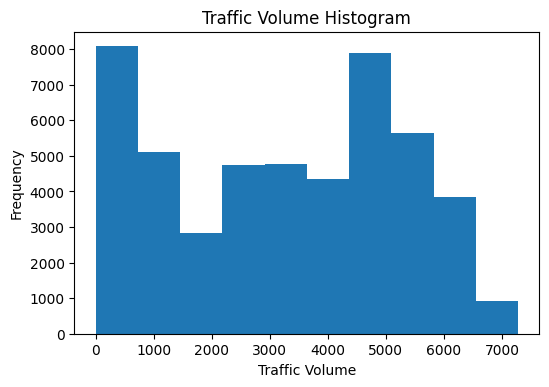

In [5]:
i_94["traffic_volume"].plot.hist()
plt.xlabel("Traffic Volume")
plt.title("Traffic Volume Histogram")
plt.show()

In [6]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012 and 2018 the hourly traffic varied from minimum of 0 to maximum of 7280 cars, mean value being 3259 cars per hour. 

Around 25% of the time there were 1193 cars per hour, but on the other hand 25% of the time there was more than 4933 cars per hour. As we don't know the exact hour when the ammount of cars was measured, let's digg deeper and see whether time of the day have any infuluence on the amout of cars. (spoiler alert: it really might have! 💁)

### 1.1 Traffic Volume: Day 🌞 vs Night 🌝

First we decide criteria on day and night. As there is no census on this we will assume that:
- Daytime data: hours from 07:00 - 19:00 (12 hours)
- Nightime data: hours from 19:00 to 07:00 (12 hours)

In [7]:
# convertint the date_time from string to datetime
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

In [8]:
# extracting the daytime values
daytime = i_94.copy()[(i_94["date_time"].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
print(daytime.shape)

# extracting the nighttime values
nighttime = i_94.copy()[(i_94["date_time"].dt.hour >= 19) | (i_94["date_time"].dt.hour < 7)]
print(nighttime.shape)     

(23877, 9)
(24327, 9)


#### Day vs Night Histogram

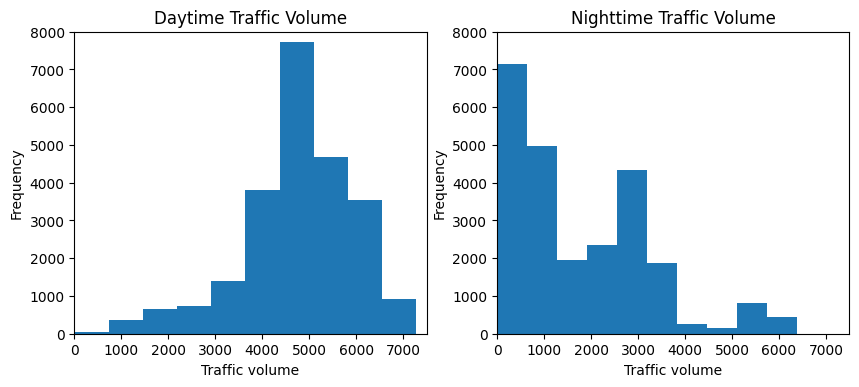

In [9]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.hist(daytime["traffic_volume"])
plt.ylabel("Frequency")
plt.ylim(0,8000)
plt.xlim(0,7500)
plt.xlabel("Traffic volume")
plt.title("Daytime Traffic Volume")

plt.subplot(1, 2, 2)
plt.hist(nighttime["traffic_volume"])
plt.ylabel("Frequency")
plt.xlabel("Traffic volume")
plt.title("Nighttime Traffic Volume")
plt.ylim(0,8000)
plt.xlim(0,7500)

plt.show()

In [10]:
daytime["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The **daytime** histogram is left skewed, meaning most traffic volume is high. Average daytime traffic is 4762 cars in hour. In 75% of cases there are more than 4252 cars passing each hour.

The **nighttime** histogram is right skewed, meaning most of the traffic volume is low. On average there were 1785 cars passing in hour during night. In 75% of cases there is 2819 cars or less passing.

The goal of this project is to find indicators of **heavy** traffic and I will proceed to analyze only the daytime traffic.

## 2. Time Indicators
One possible indicator of heavy traffis is time. The hour of day, a day in a week or month in a year can contributing to heavy traffic.

Following line plots show how the traffic volume changes according to the following parameters:
- Month
- Day of the week
- Time of the day

### 2.1 Month

In [12]:
daytime['month'] = daytime['date_time'].dt.month
by_month = daytime.groupby('month').mean()

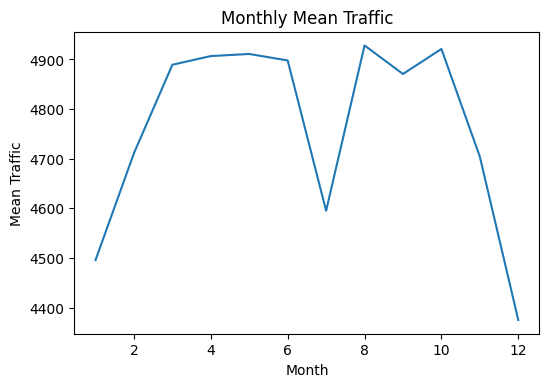

In [13]:
# Generating line plot
by_month["traffic_volume"].plot.line()
plt.ylabel("Mean Traffic")
plt.xlabel("Month")
plt.title("Monthly Mean Traffic")
plt.show()

The mean traffic is highest during March - October with a significant drop in July. The winter months November - February have lower traffic.

Since July has an unusuall drop I will investigate changes for July during the time period 2012 - 2018.

In [14]:
# Grouping mean values for each July only
daytime["year"] = daytime["date_time"].dt.year
by_july = daytime[daytime["month"] == 7]
by_july_year = by_july.groupby("year").mean()["traffic_volume"]


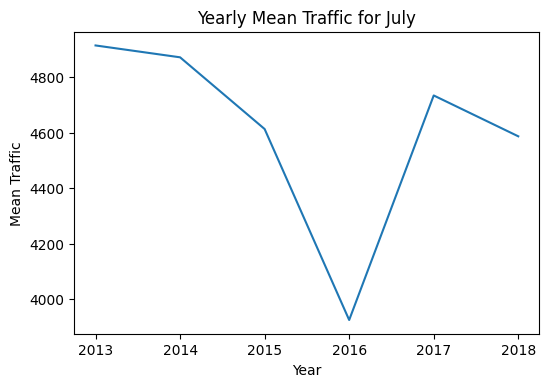

In [15]:
# Generating line plot
by_july_year.plot.line()
plt.ylabel("Mean Traffic")
plt.xlabel("Year")
plt.title("Yearly Mean Traffic for July")
plt.show()

There's significant drop in 2016. Based on [this](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696) it was most likely caused by the bridge repair works.

### 2.2 Day

In [16]:
# Creating new column dayof week
daytime["dayofweek"] = daytime["date_time"].dt.dayofweek

# Grouping mean values for each month
by_day = daytime.groupby("dayofweek").mean() # 0 is Monday, 6 is Sunday


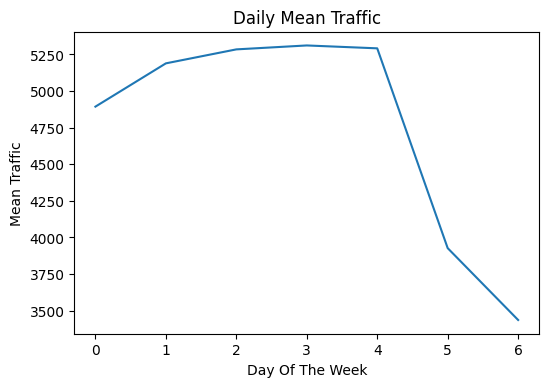

In [17]:
# Generating line plot
by_day["traffic_volume"].plot.line()
plt.ylabel("Mean Traffic")
plt.xlabel("Day Of The Week")
plt.title("Daily Mean Traffic")
plt.show()

The traffic is steadily high during the workining days (Mon - Fri) with significant drops during the weekend (Sat - Sun).

### 2.3 Bussiest Hours
In the section analyzing the bussiest traffic hours we will divide days into working days and weekend days.

In [18]:
# Creating new column hour
daytime["hour"] = daytime["date_time"].dt.hour

# Dataframe containg working days
workdays = daytime.copy()[daytime["dayofweek"] <= 4] # 0 is Monday, 6 is Sunday

# Dataframe containg weekend days
weekend = daytime.copy()[daytime["dayofweek"] >= 5] # 0 is Monday, 6 is Sunday

# Grouping mean values for hour - working days & weekend days
by_hour_workdays = workdays.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

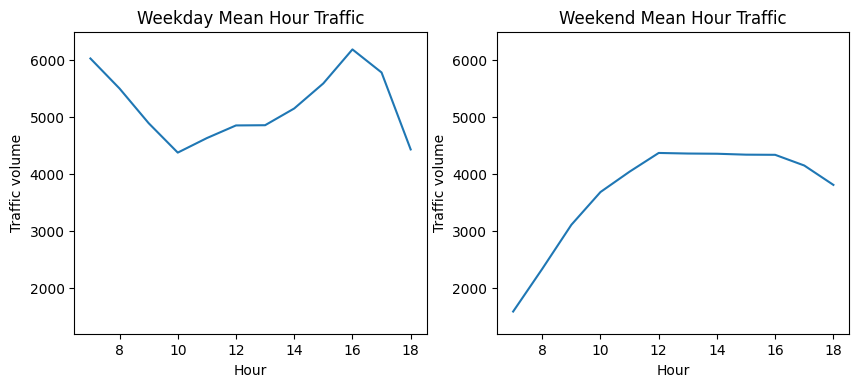

In [19]:
# Ploting line plots on grid chart to visualize the mean traffic volume
# Weekdays
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(by_hour_workdays["traffic_volume"])
plt.ylim(1200, 6500)
plt.xlabel("Hour")
plt.ylabel("Traffic volume")
plt.title("Weekday Mean Hour Traffic")

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend["traffic_volume"])
plt.ylim(1200, 6500)
plt.xlabel("Hour")
plt.ylabel("Traffic volume")
plt.title("Weekend Mean Hour Traffic")

plt.show()


**Weekday** morning rush hour is around 7 and afternoon rush hour is between 16-17, peaking with around 6000 cars. People are probably travelling for work. Lowest hour traffic is at 10 and 18.

**Weekend** rush hours are between 12-16 with around 4500 cars per hour.

Comparing both charts the weekdays are the bussiest days.

## 3. Weather Indicators
### 3.1 Numerical weather data

In [20]:
# Calculatin correlations for weather indicators
weather_num = daytime.copy().drop(columns=["weather_main","weather_description","date_time", "month", "dayofweek","year","hour"])
weather_num.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
Name: traffic_volume, dtype: float64

The strongest correlation is between `traffic_volume` and `temp`. The positive corelation is 0.128317. Other correlations are approcahing zero. 

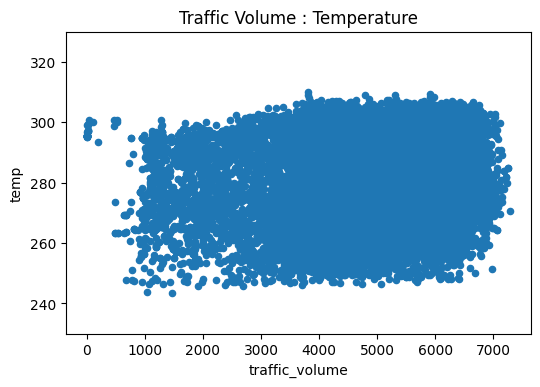

In [21]:
# Scatter plot between traffic_volume and temp
daytime.plot.scatter("traffic_volume","temp")
plt.title("Traffic Volume : Temperature")
plt.ylim(230, 330)
plt.show()

There are no significat indicators connecting temperature and heavy traffic. In the next section we will examine the textual weather columns: `weather_main` and `weather_description`.

### 3.2 Textual weather data

In [22]:
# Grouping by text weather data, calculating mean
by_weather_main = daytime.groupby("weather_main").mean()
by_weather_description = daytime.groupby("weather_description").mean()

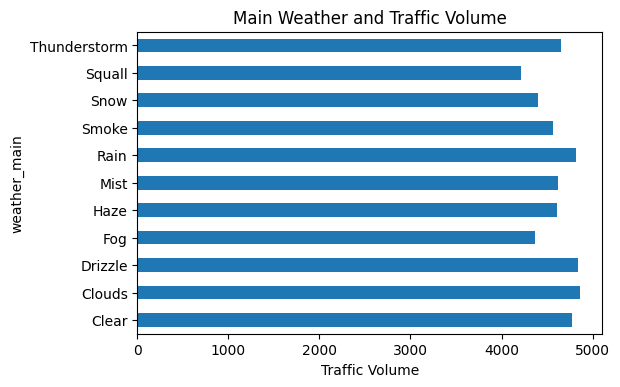

In [23]:
# Creating horizintoal bar chart for weather_main by traffic
by_weather_main["traffic_volume"].plot.barh()
plt.xlabel("Traffic Volume")
plt.title("Main Weather and Traffic Volume")
plt.show()


No main weather category indicates traffic heavier than 5000 cars per hour.

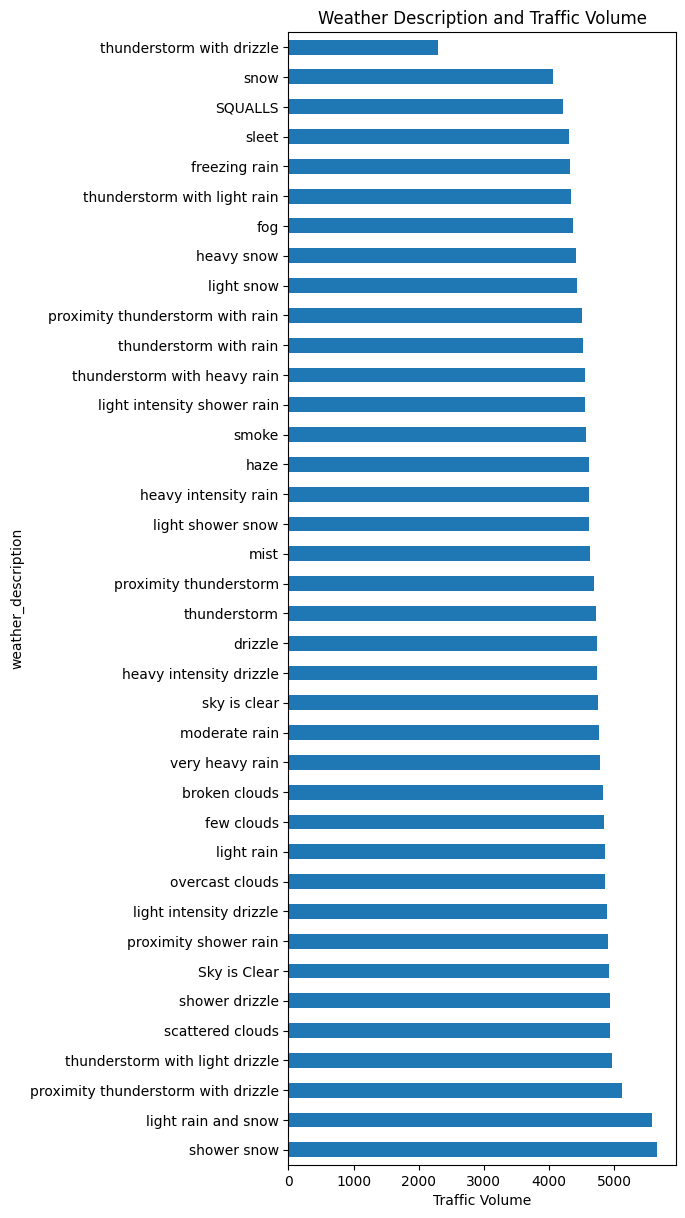

In [24]:
# Creating horizintoal bar chart for weather_description by traffic
by_weather_description["traffic_volume"].sort_values(ascending=False).plot.barh(figsize=(5,15))
plt.xlabel("Traffic Volume")
plt.title("Weather Description and Traffic Volume")
plt.show()

The weather descriptions shows that proximity thunderstorm with drizzle, light rain and snow, and shower snow play role with the heavy traffic. Next I will analyze whether those weather types and high traffic occurs in a specific month of year.

#### Top 3 Weathers with Heavy Traffic Volume

In [25]:
# proximity thunderstorm with drizzle monthly average
drizzle_thunder = daytime.copy()[daytime["weather_description"] == "proximity thunderstorm with drizzle"]
drizzle_by_month = drizzle_thunder.groupby("month").mean()["traffic_volume"]
print("thunderstorm with drizzle",drizzle_by_month)

# light rain and snow monthly average
light_rain_snow = daytime.copy()[daytime["weather_description"] == "light rain and snow"]
light_rain_snow_by_month = light_rain_snow.groupby("month").mean()["traffic_volume"]
print("light rain and snow",light_rain_snow_by_month)

# shower snow monthly average
shower_snow = daytime.copy()[daytime["weather_description"] == "shower snow"]
shower_snow_by_month = shower_snow.groupby("month").mean()["traffic_volume"]
print("shower snow",shower_snow_by_month)

thunderstorm with drizzle month
4     4226.0
8     4806.0
10    5969.5
11    4954.0
Name: traffic_volume, dtype: float64
light rain and snow month
4     5944.5
10    5691.0
12    4739.0
Name: traffic_volume, dtype: float64
shower snow month
3    5664
Name: traffic_volume, dtype: int64


Seems that the poor weather condition are at the peak months during spring/summer. And then in the winter months. Heavier traffic might be caused because people don't want to use other means of transfer when there's bad weather or that public transport is having troubles during the bad weather like snow showers.